In [3]:
# load the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [4]:
# Load the dataset and preview the first few observations
df = pd.read_csv("/content/diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Data preprocessing

## Check for missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## The dataset has no missing values found

In [6]:
# check for data types to ensure consistency
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


## All variables in the dataset are numeric

In [7]:
# Statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Exploratory Data Analysis

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

/tmp/ipython-input-3576843226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Outcome'], palette='viridis')


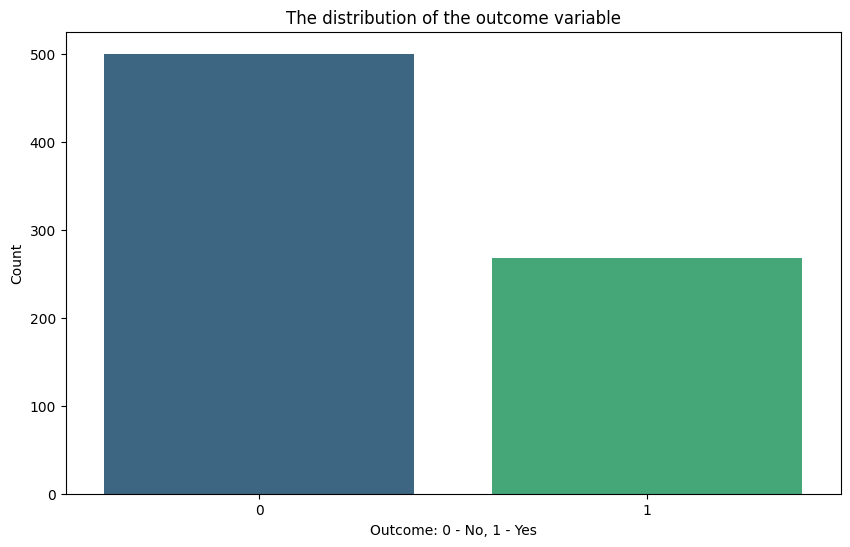

In [9]:
# Countplot of the outcome variable
plt.figure(figsize=(10,6))
sns.countplot(x=df['Outcome'], palette='viridis')
plt.title('The distribution of the outcome variable')
plt.xlabel('Outcome: 0 - No, 1 - Yes')
plt.ylabel('Count')
plt.show()

## The oucome variable has imbalanced classes of 'No' and 'Yes', with the 'No' class having the majority of participants.

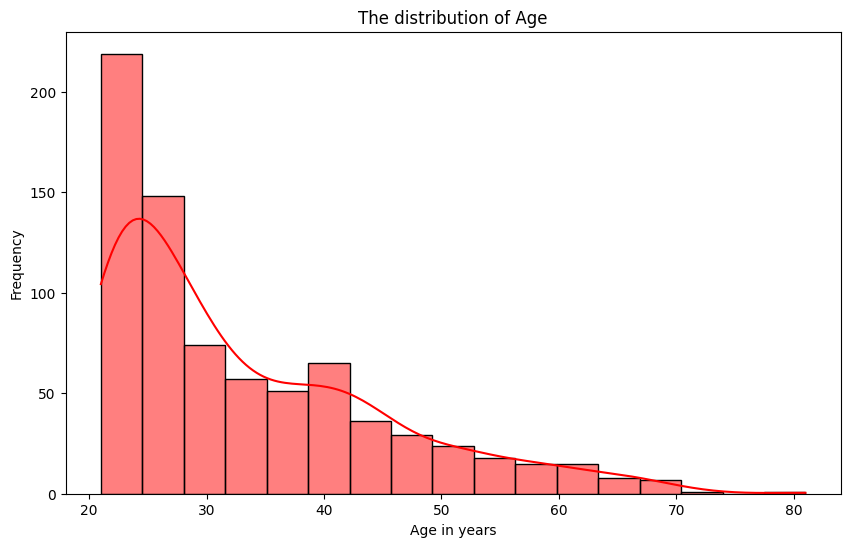

In [10]:
# The distribution of age (histogram)
plt.figure(figsize=(10,6))
sns.histplot(x=df['Age'], kde=True, color='red')
plt.title('The distribution of Age')
plt.xlabel('Age in years')
plt.ylabel('Frequency')
plt.show()


## The distribution of age variable in the dataset is left skewed, with most participants having an age range of between 20 and 70.

/tmp/ipython-input-1768679592.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Pregnancies'], palette='Set2')


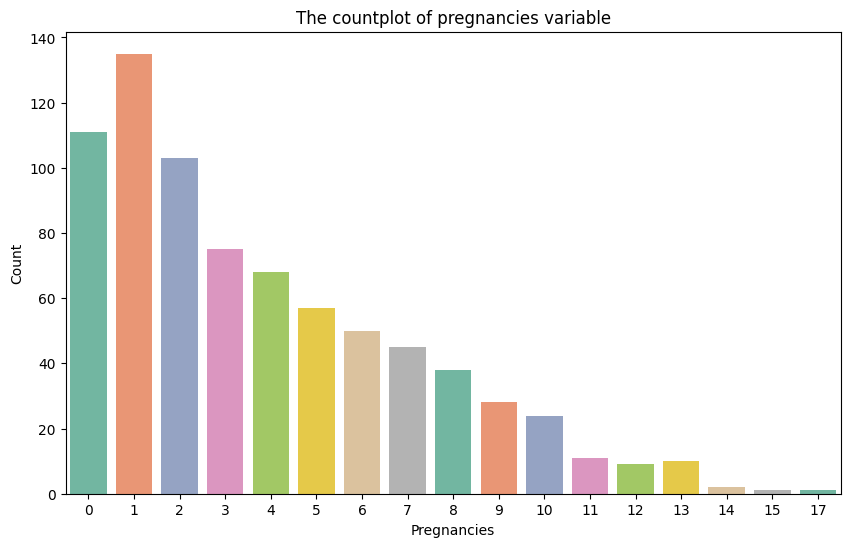

In [11]:
# The distribution of pregnancies (countplot)
plt.figure(figsize=(10,6))
sns.countplot(x=df['Pregnancies'], palette='Set2')
plt.title('The countplot of pregnancies variable')
plt.xlabel('Pregnancies')
plt.ylabel('Count')
plt.show()

## Most participants had an average pregnancy of 1

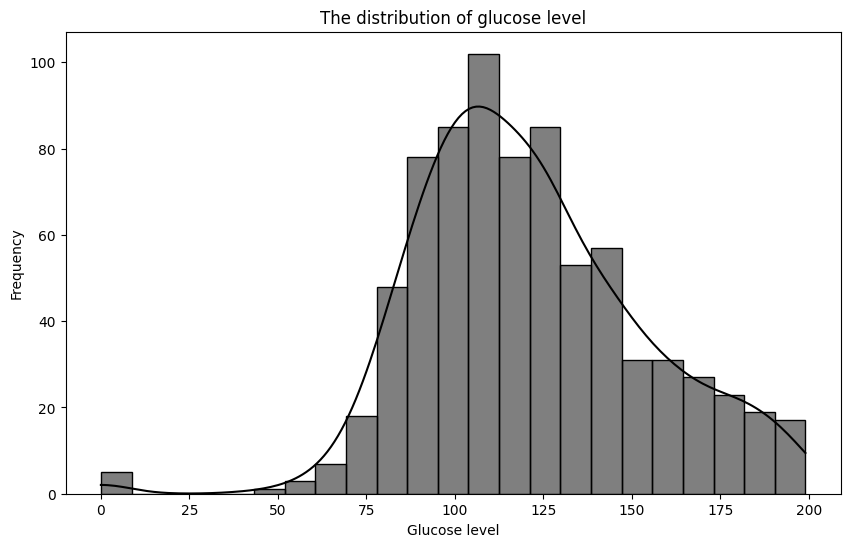

In [12]:
# The distribution of glucose level (histogram)
plt.figure(figsize=(10,6))
sns.histplot(x=df['Glucose'], kde=True, color='black')
plt.title('The distribution of glucose level')
plt.xlabel('Glucose level')
plt.ylabel('Frequency')
plt.show()

## The distribution of glucose level is approximately normally distributed. Glucose level for most participants is between 90 and 125.

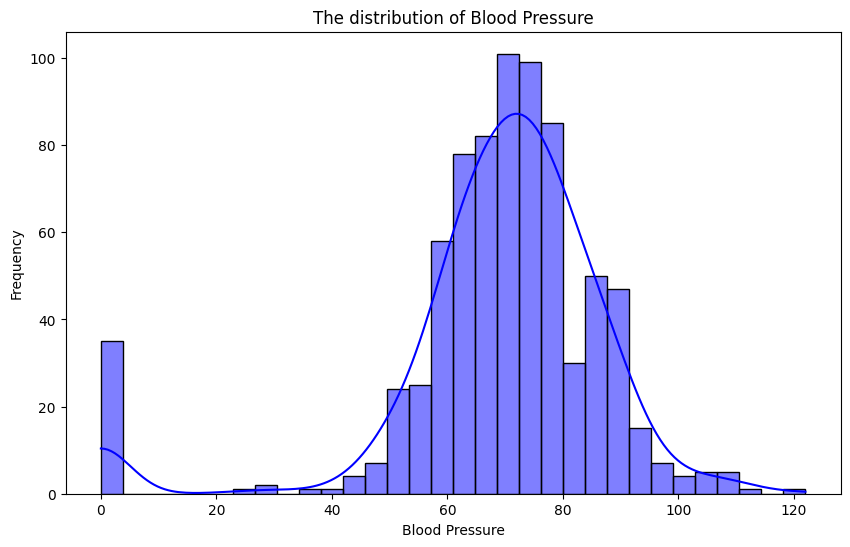

In [13]:
# The distribution of Blood pressure
plt.figure(figsize=(10,6))
sns.histplot(x=df['BloodPressure'], kde=True, color='blue')
plt.title('The distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()

## The distribution of blood pressure is approximately symmetrical, with most participants having blood pressure between 60 and 80.

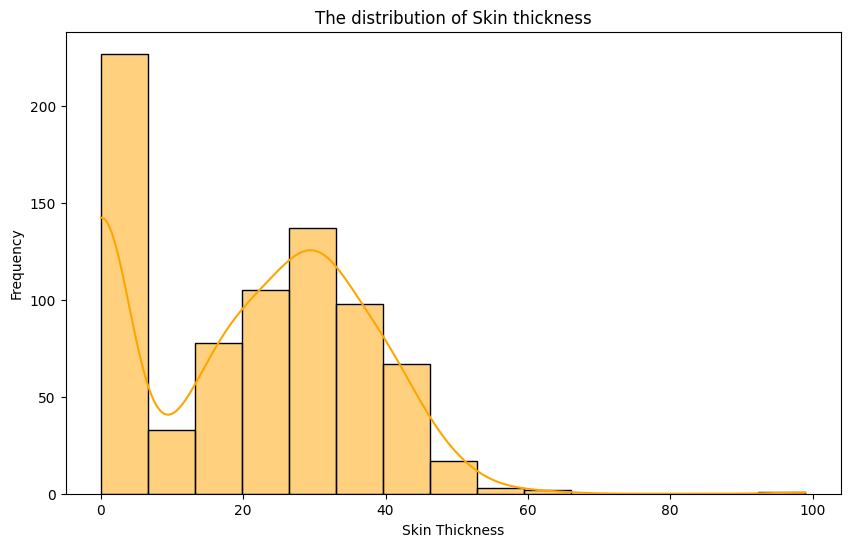

In [14]:
# The distribution of skin thickness
plt.figure(figsize=(10,6))
sns.histplot(x=df['SkinThickness'], kde=True, color='orange')
plt.title('The distribution of Skin thickness')
plt.xlabel('Skin Thickness')
plt.ylabel('Frequency')
plt.show()

## The distribution is skewed to the left with most participants having a skin thickness of between 0 and 40.

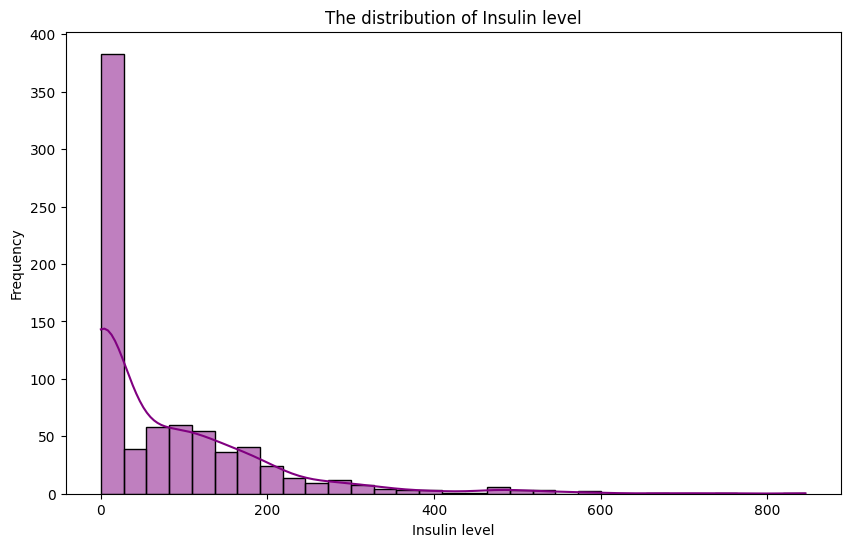

In [15]:
# The distribution of Insulin
plt.figure(figsize=(10,6))
sns.histplot(x=df['Insulin'], kde=True, color='purple')
plt.title('The distribution of Insulin level')
plt.xlabel('Insulin level')
plt.ylabel('Frequency')
plt.show()

## Most data carries insulin levels between 0 and 200. The insulin level variable is left skewed.

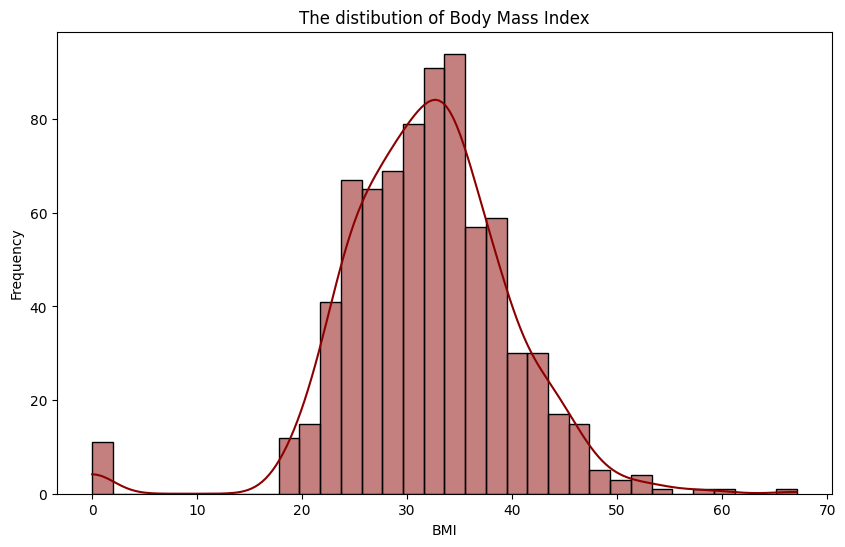

In [16]:
# The distribution of BMI
plt.figure(figsize=(10,6))
sns.histplot(x=df['BMI'], kde=True, color='darkred')
plt.title('The distibution of Body Mass Index')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

## BMI is approximately normally distributed, with most values ranging between 20 and 45.

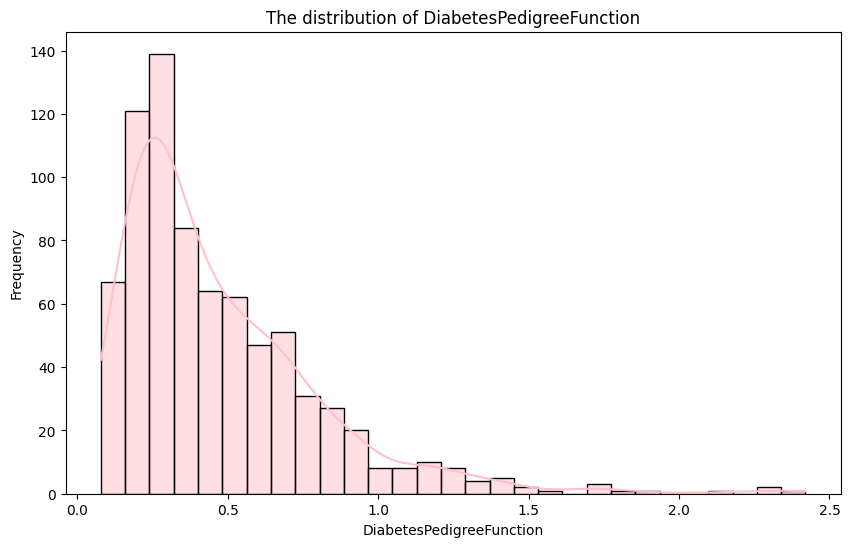

In [17]:
# The distribution of DiabetesPedigreeFunction
plt.figure(figsize=(10,6))
sns.histplot(x=df['DiabetesPedigreeFunction'], kde=True, color='pink')
plt.title('The distribution of DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')
plt.show()

# Modeling

In [18]:
# Define the dependent and independent variables
X = df.drop('Outcome', axis=1)
Y = df['Outcome']

In [19]:
# Scaling the Independent features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [20]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
# Call the logistic regression Model
logit = LogisticRegression(max_iter=1000, random_state =42)

In [22]:
# Fit the model to the data
logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [23]:
# Predict the Outcome variable using the X_test data
y_pred = logit.predict(X_test)

In [24]:
# Evaluate the model metrics
print("Accuracy Score: ", accuracy_score(y_pred, y_test))
print("Confusion Matrix: ", confusion_matrix(y_pred, y_test))

Accuracy Score:  0.7467532467532467
Confusion Matrix:  [[78 18]
 [21 37]]


In [25]:
Predictions = pd.DataFrame({
                            'Pred_Outcome': y_pred})
print(Predictions.head())
# Export the results to csv file
Predictions.to_csv('Diabetes_Predictions.csv', index = True)

   Pred_Outcome
0             0
1             0
2             0
3             0
4             0


In [26]:
# KNN
knn = KNeighborsClassifier()

In [27]:
# fit the model to the data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [28]:
# predict the outcome variable
y_pred1 = knn.predict(X_test)

In [29]:
# Evaluate the  model
print("Accuracy score: ", accuracy_score(y_pred1, y_test))

Accuracy score:  0.6623376623376623


In [30]:
print("Confusion Matrix: ", confusion_matrix(y_pred1, y_test))

Confusion Matrix:  [[70 23]
 [29 32]]


## The logistic regression model performed better than the KNN. The Logistic regression model had an accuracy of 75% while KNN had an accuracy of 68%

# Model Deployment

Automating the Preprocessing and Fitting steps

A pipeline allows you to chain Data preprocessing and Modeling in a single object

In [31]:
# Define the pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [37]:
numeric_cols= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [38]:
from sklearn.preprocessing import StandardScaler
numerical_transformer = StandardScaler()

In [44]:
preprocessor = ColumnTransformer(
    transformers=
    [('num', numerical_transformer, numeric_cols)]
)

In [47]:
pipe = Pipeline(steps=[
     ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
 ])
 # fit pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('clf', LogisticRegression(max_iter=1000, random_state=42))])

In [48]:
# Predict pipeline
y_pred = pipe.predict(X_test)

In [49]:
from sklearn.metrics import classification_report
print(f"The Classification Report: {classification_report(y_pred, y_test)}")

The Classification Report:               precision    recall  f1-score   support

           0       0.80      0.81      0.81        97
           1       0.67      0.65      0.66        57

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## Why Use a Pipeline?

  - Keeps your code modular and clean
  - Avoids data leakage (fit only on training data)
  - Easy to save, reuse, and deploy


## Saving and Loading Models (Joblib / Pickle)

- When your model is trained and ready, you’ll want to save it and reload it later (for use in APIs or batch predictions).

In [50]:
 # Save with joblib
import joblib

# # save the pipeline
joblib.dump(pipe, 'diabetes_pipeline.pkl')

# load the pipeline
# model_loaded = joblib.load('diabetes_pipeline.pkl')

# # Use it
# model_loaded.predict(X_test)

['diabetes_pipeline.pkl']

## Joblib is specifically for ML models and numpy arrays, its faster and more efficient for large data

- Once your model is saved, the next step is making it accessible — turning it into an API or web app.